In [117]:
import ollama

In [118]:
def generatellama(lol, hours):
  output=""
  ollama_response = ollama.chat(
    model='llama2:text',
    stream=True,
    messages=[
      {
        'role': 'user',
        'content': lol,
      },
    ],
    options={
      'temperature': 0.4
    }
  )
  for chunk in ollama_response:
    if chunk['message']['content']=="\n":
      
      if hours==1:
        break
      hours-=1
    output+=chunk['message']['content']
  return output if output[0]!="\n" else output[1:]



In [119]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

df = pd.read_csv('combined_IGI_airport.csv', parse_dates=['Timestamp'])
df.interpolate(method='linear', inplace=True)



In [120]:
import pandas as pd

df = pd.read_csv('combined_IGI_airport.csv', parse_dates=['Timestamp'])
df.interpolate(method='linear', inplace=True)


In [121]:

input_plus_actual_df = df.tail(168 + 24)

input_df = input_plus_actual_df.head(168)

actual_df = input_plus_actual_df.tail(24)


In [122]:

input_string = input_df.to_csv(index=False, header=False)


In [123]:
predicted_values_string = generatellama(input_string, 24)



In [124]:
print(predicted_values_string)

2023-12-30 24:00:00,222.69,367.82,34.04,13.54,49.9625
2023-12-30 25:00:00,215.6275,359.595,35.33,12.82,50.455
2023-12-30 26:00:00,211.4675,359.59,35.42,12.97,50.45
2023-12-30 27:00:00,218.5375,352.275,36.1025,13.07,50.975
2023-12-30 28:00:00,224.0925,348.845,38.22,13.6625,50.11
2023-12-30 29:00:00,229.7725,343.3875,37.75,14.2275,48.65
2023-12-30 30:00:00,236.2875,349.65,35.93,13.58,48.3525
2023-12-30 31:00:00,239.8225,356.4275,34.72,14.01,48.1975
2023-12-30 32:00:00,245.2025,353.42,34.63,13.78,48.72
2023-12-30 33:00:00,249.2325,358.405,33.55,14.22,47.62
2023-12-30 34:00:00,252.4925,357.83,33.67,13.87,47.72
2023-12-30 35:00:00,256.345,356.4275,33.91,13.91,47.95
2023-12-30 36:00:00,258.97,353.42,33.42,13.83,48.04
2023-12-30 37:00:00,263.3925,353.42,33.15,14.01,47.83
2023-12-30 38:00:00,266.4675,353.42,33.09,13.94,47.83
2023-12-30 39:00:00,269.8825,353.42,32.87,14.01,47.83
2023-12-30 40:00:00,273.95,353.42,32.64,14.01,47.83
2023-12-30 41:00:00,277.78,353.42,32.51,14.01,47.83
2023-12-30 42

In [125]:
from io import StringIO
predicted_df = pd.read_csv(StringIO(predicted_values_string), header=None)
predicted_df.columns = df.columns  # Assuming the LLM outputs without headers



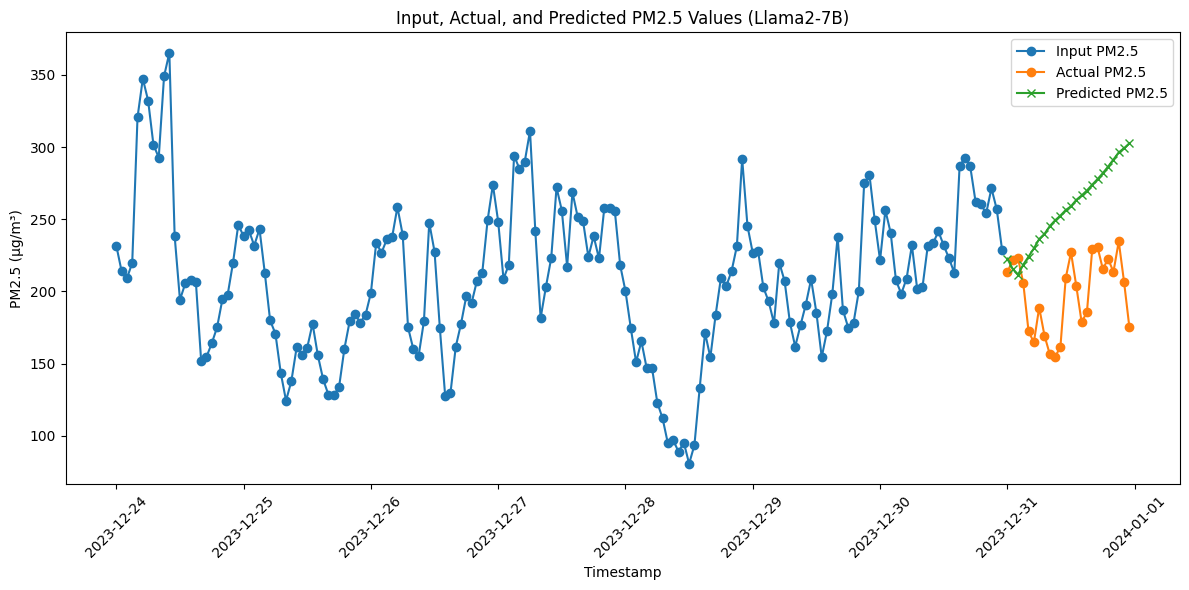

In [126]:
import matplotlib.pyplot as plt

# Assuming predicted_df has been prepared as shown earlier

plt.figure(figsize=(12, 6))
plt.plot(input_df['Timestamp'], input_df['PM2.5 (µg/m³)'], label='Input PM2.5', marker='o')
plt.plot(actual_df['Timestamp'], actual_df['PM2.5 (µg/m³)'], label='Actual PM2.5', marker='o')
plt.plot(actual_df['Timestamp'], predicted_df['PM2.5 (µg/m³)'].head(24), label='Predicted PM2.5', marker='x')  # Ensure the column index is correct for PM2.5 predictions
plt.title('Input, Actual, and Predicted PM2.5 Values (Llama2-7B)')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


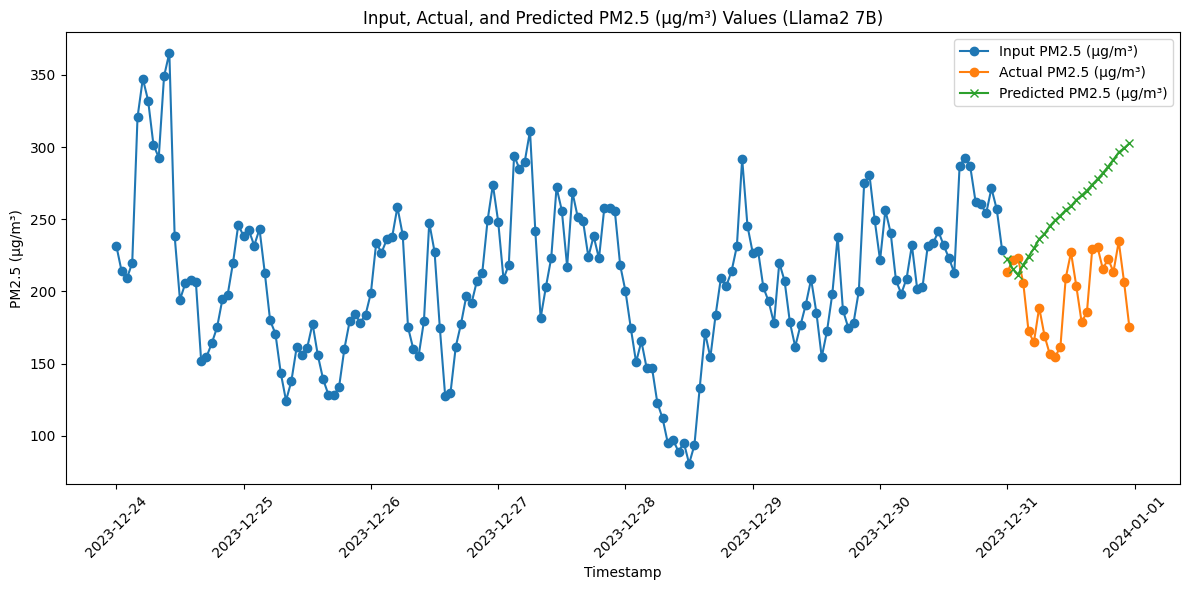

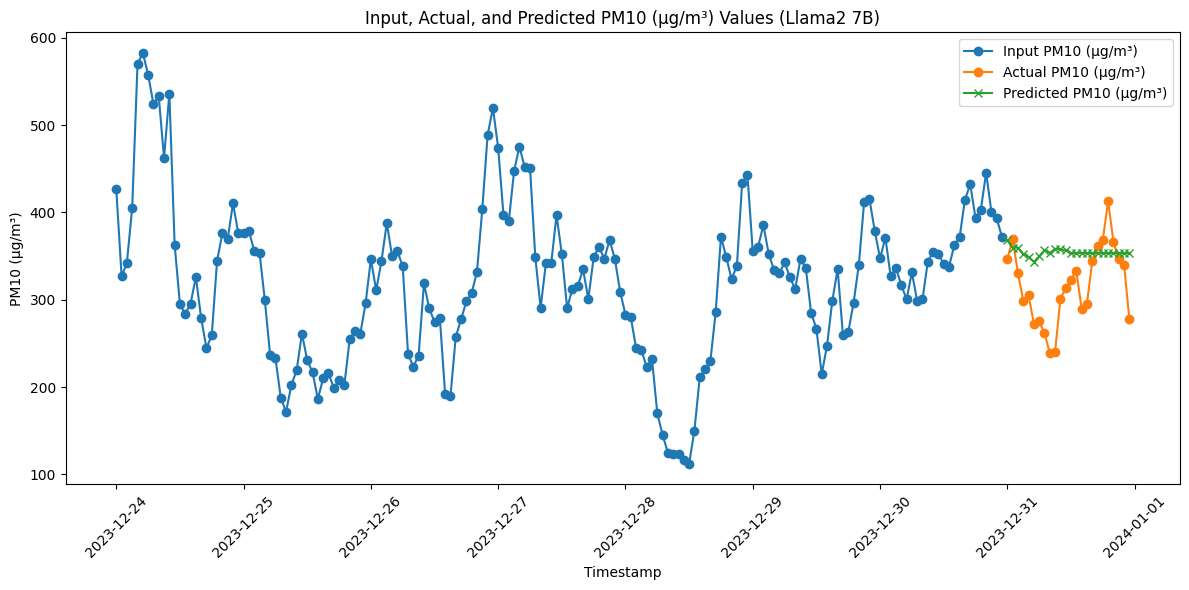

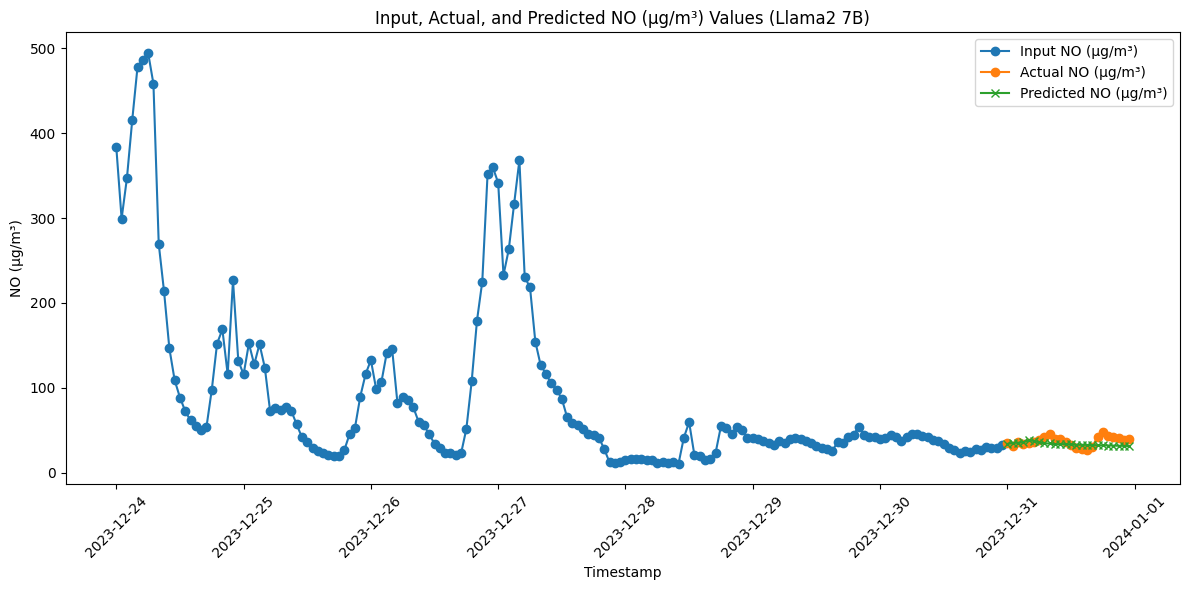

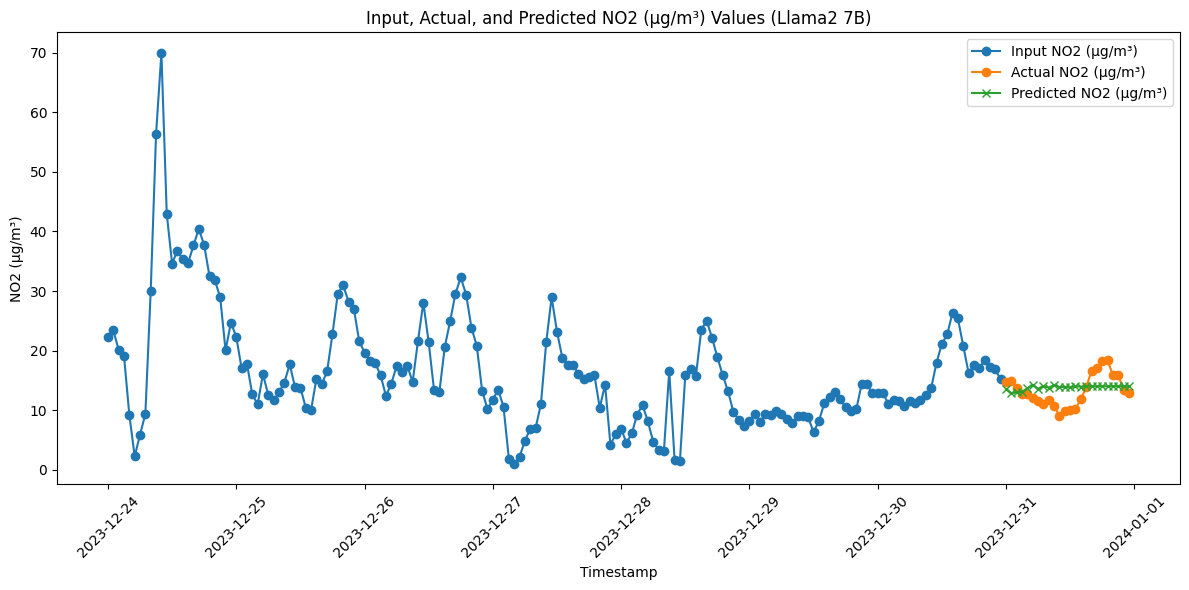

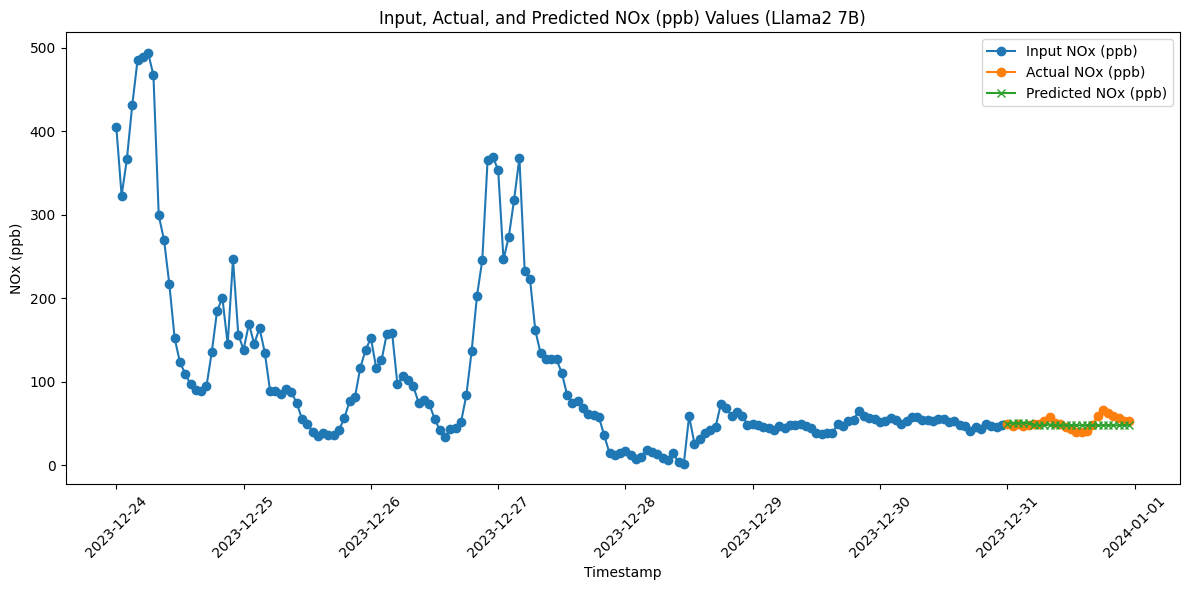

In [128]:
def plot_parameters(input_df, actual_df, predicted_df, parameters):
    for param in parameters:
        plt.figure(figsize=(12, 6))
        plt.plot(input_df['Timestamp'], input_df[param], label=f'Input {param}', marker='o')
        plt.plot(actual_df['Timestamp'], actual_df[param], label=f'Actual {param}', marker='o')
        plt.plot(actual_df['Timestamp'], predicted_df[param], label=f'Predicted {param}', marker='x')
        plt.title(f'Input, Actual, and Predicted {param} Values (Llama2 7B)')
        plt.xlabel('Timestamp')
        plt.ylabel(param)
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Assuming you have input_df, actual_df, predicted_df prepared
parameters = ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)']
plot_parameters(input_df, actual_df, predicted_df, parameters)
